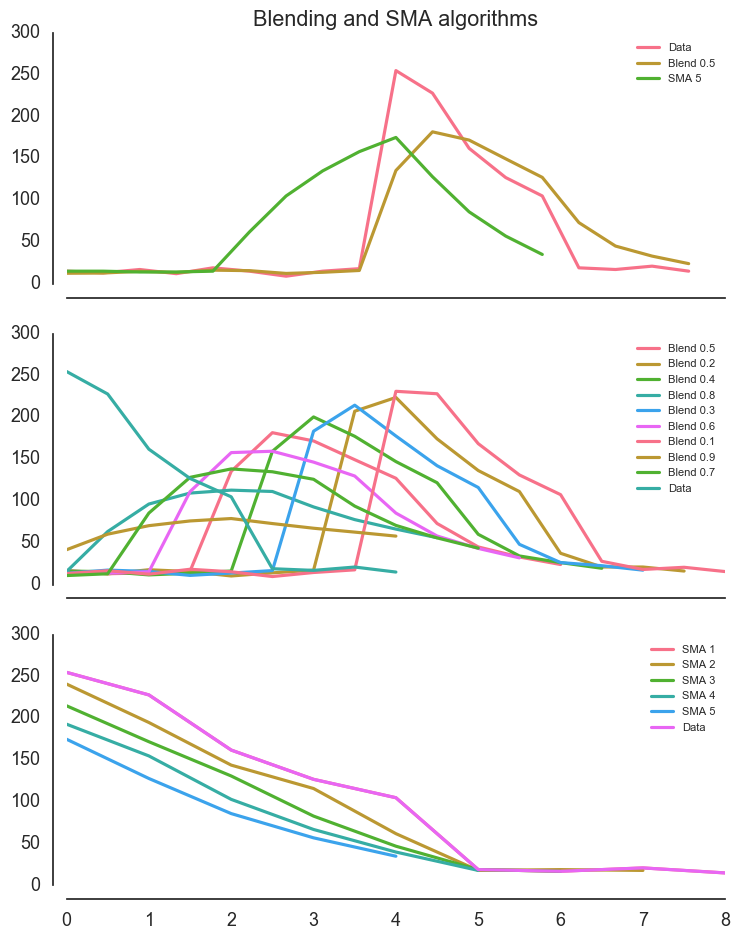

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


def filter_blending(values, K):
    """Blending filter fn."""
    val = values.pop(0)
    blending_values = []
    for i, x in enumerate(values):
        val = K*val + (1-K)*x
        blending_values.append(val)
    return blending_values

def filter_sma(values, periods):
    """Simple moving average filter fn."""
    sma_values = []
    for i, x in enumerate(values):
        if len(values[i:periods+i]) == periods:
            val = sum(values[i:periods+i])/periods
            sma_values.append(val)
    return sma_values


if __name__ == "__main__":
    """Comparison"""
    data = [10,15,13,17,12,19,15,9,15,18,255,228,162,127,105, 19, 17, 21, 15]

    sns.set_style("white")
    sns.set_context("talk")
    sns.set_palette("husl")

    fig = plt.figure(figsize=(8.5, 11), dpi=100)
    
    ax = fig.add_subplot(3,1,1)
    K = 0.5
    blend = filter_blending(data, K)
    periods = 5
    sma = filter_sma(data, periods)
    ax_data = ax.plot(data, label="Data")
    ax_blend = ax.plot(blend, label="Blend "+str(K))
    ax_sma = ax.plot(sma, label="SMA "+str(periods))
    ax_title = ax.set_title("Blending and SMA algorithms")
    ax_legend = ax.legend(loc=1, prop={'size': 8})
    ax.axes.get_xaxis().set_visible(False)

    ax2 = fig.add_subplot(3,1,2)
    K_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    blend_dict = {}
    for K in K_list:
        blend_dict[K] = filter_blending(data, K)
    for key in blend_dict:
        ax2_blend = ax2.plot(blend_dict[key], label="Blend "+str(key))
    ax2_data = ax2.plot(data, label="Data")
    ax2.legend(loc=1, prop={'size': 8})
    ax2.axes.get_xaxis().set_visible(False)

    ax3 = fig.add_subplot(3,1,3)
    p_list = [1, 2, 3, 4, 5]
    sma_dict = {}
    for periods in p_list:
        sma_dict[periods] = filter_sma(data, periods)
    for key in sma_dict:
        ax3_sma = ax3.plot(sma_dict[key], label="SMA "+str(key))
    ax3_data = ax3.plot(data, label="Data")
    ax3_legend = ax3.legend(loc=1, prop={'size': 8})

    sns.despine(offset=10, trim=True)
